In [2]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

def get_video_comments(api_key, video_id):
    # build the YouTube API client
    youtube = build('youtube', 'v3', developerKey=api_key)

    # set the video ID and retrieve the comments
    comments = []
    next_page_token = None
    while True:
        try:
            response = youtube.commentThreads().list(
                part='snippet',
                videoId=video_id,
                textFormat='plainText',
                order='time',
                pageToken=next_page_token,
                maxResults=100
            ).execute()
            for item in response['items']:
                comment_time = item['snippet']['topLevelComment']['snippet']['publishedAt']
                comment_text = item['snippet']['topLevelComment']['snippet']['textDisplay']
                comment_obj = {
                    'time': comment_time,
                    'text': comment_text,
                }
                comments.append(comment_obj)
            next_page_token = response.get('nextPageToken')
            if not next_page_token:
                break
        except HttpError as e:
            print(f'An error occurred: {e}')
            break
    return comments


In [3]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

def search_channel_videos(api_key, channel_name, search_term):
    # build the YouTube API client
    youtube = build('youtube', 'v3', developerKey=api_key)

    # search for the channel ID based on the channel name
    channel_id = None
    try:
        response = youtube.search().list(
            part='id',
            q=channel_name,
            type='channel',
            maxResults=1
        ).execute()
        channel_id = response['items'][0]['id']['channelId']
    except HttpError as e:
        print(f'An error occurred: {e}')

    # retrieve the video IDs, titles, and published dates for all videos in the channel that match the search term
    videos = []
    next_page_token = None
    while True:
        try:
            response = youtube.search().list(
                part='id,snippet',
                channelId=channel_id,
                q=search_term,
                type='video',
                order='date',
                pageToken=next_page_token,
                maxResults=50
            ).execute()
            for item in response['items']:
                video_id = item['id']['videoId']
                video_title = item['snippet']['title']
                video_published_at = item['snippet']['publishedAt']
                channel_name = item['snippet']['channelTitle']
                video_obj = {
                    'id': video_id,
                    'title': video_title,
                    'published_at': video_published_at,
                    'channel_name': channel_name
                }
                videos.append(video_obj)
            next_page_token = response.get('nextPageToken')
            if not next_page_token:
                break
        except HttpError as e:
            print(f'An error occurred: {e}')
            break
    return videos


In [4]:
def pretty_print(dicti):
    import json
    print(json.dumps(dicti, indent=2))

In [5]:
# build the YouTube API client
# Open the file with the API key
with open('api_key.txt', 'r') as f:
    api_key = f.read()
# set the video ID and retrieve the comments
video_id = 'xlQT-6Rcjrk'

In [6]:
# Test the search_channel_videos function
videos = search_channel_videos(api_key, "savagegeese", "Ford")

In [7]:
pretty_print(videos)

[
  {
    "id": "zg6xa2caG-I",
    "title": "Understanding Engine Break In | Dos and Don&#39;ts",
    "published_at": "2023-04-14T12:30:29Z",
    "channel_name": "savagegeese"
  },
  {
    "id": "CgHyV0nAAcw",
    "title": "Hummer EV | New Formula for Beast Trucks",
    "published_at": "2023-04-07T12:30:10Z",
    "channel_name": "savagegeese"
  },
  {
    "id": "b0KhgmAoEFk",
    "title": "Toyota Corolla Hybrid | Say a Prayer for Small Cars",
    "published_at": "2023-03-27T14:30:10Z",
    "channel_name": "savagegeese"
  },
  {
    "id": "nJffmiJy-IM",
    "title": "2023 Honda Pilot | How To Fix Forgettable SUVs",
    "published_at": "2023-02-17T13:30:11Z",
    "channel_name": "savagegeese"
  },
  {
    "id": "ujx15YKo5tA",
    "title": "2023 Kia Niro EV | Millennial Punishment",
    "published_at": "2023-02-13T13:30:15Z",
    "channel_name": "savagegeese"
  },
  {
    "id": "EQt7pOQOoTo",
    "title": "Do People Really Want Hybrid Cars? | Starring Jeep 4xe",
    "published_at": "2023-

In [8]:
import pandas as pd

# list of channel names to search
# savagesgeese
# AutoTrader
# Throttle House
# TheStraightPipes

channel_name_list = ['savagegeese', 'AutoTrader', 'Throttle House', 'TheStraightPipes']

# search term
search_term = 'Ford'

# empty list to store the results from each channel
all_videos = []

# loop through each channel name and retrieve the matching videos
for channel_name in channel_name_list:
    videos = search_channel_videos(api_key, channel_name, search_term)
    all_videos.extend(videos)

# convert the results to a pandas DataFrame
df = pd.DataFrame(all_videos)



In [9]:
display(df)

,id,title,published_at,channel_name
0,zg6xa2caG-I,Understanding Engine Break In | Dos and Don&#3...,2023-04-14T12:30:29Z,savagegeese
1,CgHyV0nAAcw,Hummer EV | New Formula for Beast Trucks,2023-04-07T12:30:10Z,savagegeese
2,b0KhgmAoEFk,Toyota Corolla Hybrid | Say a Prayer for Small...,2023-03-27T14:30:10Z,savagegeese
3,nJffmiJy-IM,2023 Honda Pilot | How To Fix Forgettable SUVs,2023-02-17T13:30:11Z,savagegeese
4,ujx15YKo5tA,2023 Kia Niro EV | Millennial Punishment,2023-02-13T13:30:15Z,savagegeese
...,...,...,...,...
544,kmptH4HYCPw,Ford Ranger Review + Honda Element - The Every...,2016-12-06T15:45:26Z,TheStraightPipes
545,mp_nN6_1U0Q,2016 Focus RS - Pure Exhaust Sound!,2016-08-28T23:00:02Z,TheStraightPipes
546,AAsbucFABNE,LOUD Mustang GT350 - Pure Exhaust Sound,2016-08-14T23:00:10Z,TheStraightPipes
547,4cikHgHH-hs,Focus ST - Pure Intake and Exhaust Sounds,2015-11-02T21:20:43Z,TheStraightPipes


In [10]:
# get the videos that have "Ford" in the title, in any case
ford_vids = df[df['title'].str.contains('Ford', case=False)].copy()

# convert the published_at column to a pandas datetime object
ford_vids['published_at'] = pd.to_datetime(ford_vids['published_at'])

# set the index of the DataFrame to the publication date
ford_vids.set_index('published_at', inplace=True)

ford_vids['group_number'] = -1

# group the videos by a custom time interval of 7 days
grouped = ford_vids.groupby(pd.Grouper(freq='7D'))

# iterate through each group and print the count of videos in each group
group_number = 0

for group_name, group in grouped:
    # print(f'Videos released between {group_name.date()} and {(group_name + pd.Timedelta(days=6)).date()}: {len(group)}')
    # set the group number for each video in the group
    # print(group_name)
    for index, row in group.iterrows():
        # print("here")
        ford_vids.loc[index, 'group_number'] = group_number
    group_number += 1

# ford_vids groupby group_number keep the ones that have more than 1 video
ford_vids = ford_vids.groupby('group_number').filter(lambda x: len(x) > 1)
ford_vids.sort_values(by=['group_number'], inplace=True)

# Make index a column as well
ford_vids.reset_index(inplace=True)
display(ford_vids)



# Get last published date for each group
last_published_date = ford_vids.groupby('group_number')['published_at'].max()
display(last_published_date)

# Add 1 day to the last published date
last_published_date = last_published_date + pd.Timedelta(days=1)

# Merge with ford_vids left join on group_number and published_at
ford_vids = ford_vids.merge(last_published_date, on='group_number', how='left', suffixes=('', '_max'))

display(ford_vids)


,published_at,id,title,channel_name,group_number
0,2014-05-23 13:44:09+00:00,OniL0JTAj7Q,Ford Ka hatchback car review,AutoTrader,68
1,2014-05-27 16:26:46+00:00,gAQBxpnJybk,Ford S-MAX MPV expert car review,AutoTrader,68
2,2014-08-21 11:30:17+00:00,d2EFeJ1lxNY,Ford Focus car review,AutoTrader,80
3,2014-08-21 11:30:18+00:00,K3qDfb7KFOE,Ford Focus estate car review,AutoTrader,80
4,2014-08-21 15:50:31+00:00,mdSCB9CJhGg,Ford Grand C-MAX MPV expert car review,AutoTrader,80
...,...,...,...,...,...
57,2022-09-17 12:12:24+00:00,ClDx1kTsVpc,UNLIMITED Electric Range hack in the new F150 ...,TheStraightPipes,502
58,2022-09-19 12:30:17+00:00,bCuaJXYqUCs,2022 Ford Explorer Timberline | How to Burn $5...,savagegeese,502
59,2022-11-18 13:01:31+00:00,b7KVutuuQbw,WHO BUYS THIS? 2023 Ford Mustang Ecoboost HIGH...,TheStraightPipes,511
60,2022-11-23 14:39:34+00:00,XD5gxyksQrE,FORD vs GM vs DODGE #supercars #musclecars #am...,TheStraightPipes,511


group_number
68    2014-05-27 16:26:46+00:00
80    2014-08-21 15:50:31+00:00
81    2014-08-22 16:03:41+00:00
108   2015-03-05 15:47:36+00:00
124   2015-06-25 18:39:31+00:00
168   2016-04-28 11:31:13+00:00
219   2017-04-20 22:47:29+00:00
234   2017-08-03 14:30:31+00:00
235   2017-08-08 14:29:47+00:00
237   2017-08-20 04:36:32+00:00
269   2018-04-04 14:30:51+00:00
275   2018-05-17 15:58:59+00:00
282   2018-07-05 15:14:39+00:00
293   2018-09-17 17:14:02+00:00
294   2018-09-27 14:36:41+00:00
302   2018-11-21 17:07:32+00:00
394   2020-08-25 12:00:44+00:00
406   2020-11-15 23:00:09+00:00
431   2021-05-07 12:30:01+00:00
432   2021-05-18 17:58:25+00:00
440   2021-07-15 12:00:12+00:00
458   2021-11-15 13:00:09+00:00
465   2022-01-05 13:00:34+00:00
470   2022-02-05 13:41:56+00:00
493   2022-07-18 10:00:03+00:00
502   2022-09-19 12:30:17+00:00
511   2022-11-23 14:39:34+00:00
Name: published_at, dtype: datetime64[ns, UTC]

,published_at,id,title,channel_name,group_number,published_at_max
0,2014-05-23 13:44:09+00:00,OniL0JTAj7Q,Ford Ka hatchback car review,AutoTrader,68,2014-05-28 16:26:46+00:00
1,2014-05-27 16:26:46+00:00,gAQBxpnJybk,Ford S-MAX MPV expert car review,AutoTrader,68,2014-05-28 16:26:46+00:00
2,2014-08-21 11:30:17+00:00,d2EFeJ1lxNY,Ford Focus car review,AutoTrader,80,2014-08-22 15:50:31+00:00
3,2014-08-21 11:30:18+00:00,K3qDfb7KFOE,Ford Focus estate car review,AutoTrader,80,2014-08-22 15:50:31+00:00
4,2014-08-21 15:50:31+00:00,mdSCB9CJhGg,Ford Grand C-MAX MPV expert car review,AutoTrader,80,2014-08-22 15:50:31+00:00
...,...,...,...,...,...,...
57,2022-09-17 12:12:24+00:00,ClDx1kTsVpc,UNLIMITED Electric Range hack in the new F150 ...,TheStraightPipes,502,2022-09-20 12:30:17+00:00
58,2022-09-19 12:30:17+00:00,bCuaJXYqUCs,2022 Ford Explorer Timberline | How to Burn $5...,savagegeese,502,2022-09-20 12:30:17+00:00
59,2022-11-18 13:01:31+00:00,b7KVutuuQbw,WHO BUYS THIS? 2023 Ford Mustang Ecoboost HIGH...,TheStraightPipes,511,2022-11-24 14:39:34+00:00
60,2022-11-23 14:39:34+00:00,XD5gxyksQrE,FORD vs GM vs DODGE #supercars #musclecars #am...,TheStraightPipes,511,2022-11-24 14:39:34+00:00


In [11]:
# get comments for each video for ford_vids and keep the ones before published_at_max
all_comments = []
for index, row in ford_vids.iterrows():
    video_id = row['id']
    published_at_max = row['published_at_max']
    comments = get_video_comments(api_key, video_id)
    for comment in comments:
        comment_time = comment['time']
        comment_text = comment['text']
        # comment time to Timestamp
        comment_time = pd.to_datetime(comment_time)
        if comment_time > published_at_max:
            continue
        comment_obj = {
            'video_id': video_id,
            'comment_time': comment_time,
            'comment_text': comment_text,
        }
        all_comments.append(comment_obj)

# convert the results to a pandas DataFrame
comments_df = pd.DataFrame(all_comments)

In [12]:
display(comments_df)

,video_id,comment_time,comment_text
0,OniL0JTAj7Q,2014-05-23 21:02:22+00:00,You cant describe a cars look on a person who ...
1,d2EFeJ1lxNY,2014-08-21 18:07:32+00:00,"Not to be... ehm... complaining, but... 30 VID..."
2,Wq1xkBtkN7M,2014-08-23 15:10:07+00:00,It's always good to hear what actual buyers th...
3,_o4LOZdySeo,2014-08-22 17:34:06+00:00,"Ok, so when you put your wife in the reviews i..."
4,nghCB57ISr4,2015-03-06 09:17:41+00:00,"Ford GT because, lighter, broader torque band ..."
...,...,...,...
14640,uTu5RRkTHsE,2022-11-19 13:02:56+00:00,first as always
14641,uTu5RRkTHsE,2022-11-19 13:02:40+00:00,Give me a heart
14642,uTu5RRkTHsE,2022-11-19 13:02:35+00:00,First?
14643,uTu5RRkTHsE,2022-11-19 13:02:31+00:00,I'm 1st


In [13]:
# use sentiment analysis pipeline to get the sentiment of each comment
from transformers import pipeline

# load the sentiment analysis pipeline
sentiment_analysis = pipeline('sentiment-analysis')

# get the sentiment of each comment
for index, row in comments_df.iterrows():
    comment_text = row['comment_text']
    try:
        sentiment = sentiment_analysis(comment_text)[0]
        comments_df.loc[index, 'sentiment'] = sentiment['label']
        comments_df.loc[index, 'score'] = sentiment['score']
    except:
        comments_df.loc[index, 'sentiment'] = 'error'
        comments_df.loc[index, 'score'] = 0

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors


In [14]:
# get id, group_number, published_at_max
comments_df = comments_df.merge(ford_vids[['id', 'group_number', 'published_at_max']], left_on="video_id", right_on="id", how="left")

In [15]:
comments_df

,video_id,comment_time,comment_text,sentiment,score,id,group_number,published_at_max
0,OniL0JTAj7Q,2014-05-23 21:02:22+00:00,You cant describe a cars look on a person who ...,NEGATIVE,0.998988,OniL0JTAj7Q,68,2014-05-28 16:26:46+00:00
1,d2EFeJ1lxNY,2014-08-21 18:07:32+00:00,"Not to be... ehm... complaining, but... 30 VID...",NEGATIVE,0.997982,d2EFeJ1lxNY,80,2014-08-22 15:50:31+00:00
2,Wq1xkBtkN7M,2014-08-23 15:10:07+00:00,It's always good to hear what actual buyers th...,POSITIVE,0.977286,Wq1xkBtkN7M,81,2014-08-23 16:03:41+00:00
3,_o4LOZdySeo,2014-08-22 17:34:06+00:00,"Ok, so when you put your wife in the reviews i...",POSITIVE,0.998341,_o4LOZdySeo,81,2014-08-23 16:03:41+00:00
4,nghCB57ISr4,2015-03-06 09:17:41+00:00,"Ford GT because, lighter, broader torque band ...",POSITIVE,0.974407,nghCB57ISr4,108,2015-03-06 15:47:36+00:00
...,...,...,...,...,...,...,...,...
14640,uTu5RRkTHsE,2022-11-19 13:02:56+00:00,first as always,POSITIVE,0.997943,uTu5RRkTHsE,511,2022-11-24 14:39:34+00:00
14641,uTu5RRkTHsE,2022-11-19 13:02:40+00:00,Give me a heart,POSITIVE,0.999839,uTu5RRkTHsE,511,2022-11-24 14:39:34+00:00
14642,uTu5RRkTHsE,2022-11-19 13:02:35+00:00,First?,NEGATIVE,0.896273,uTu5RRkTHsE,511,2022-11-24 14:39:34+00:00
14643,uTu5RRkTHsE,2022-11-19 13:02:31+00:00,I'm 1st,POSITIVE,0.999703,uTu5RRkTHsE,511,2022-11-24 14:39:34+00:00


In [16]:
# Drop comments with score less than 0.9
comments_df = comments_df[comments_df['score'] > 0.9]

In [32]:
# group by group number do value counts of sentiment
sentiment_counts = comments_df.groupby(['group_number'])['sentiment'].value_counts().unstack().fillna(0)
# pnr ratio
sentiment_counts['pnr_ratio'] = sentiment_counts['POSITIVE'] / (sentiment_counts['NEGATIVE'] + sentiment_counts['POSITIVE'])


sentiment_counts

sentiment,NEGATIVE,POSITIVE,pnr_ratio
group_number,,,
68,1.0,0.0,0.000000
80,1.0,0.0,0.000000
81,0.0,2.0,1.000000
108,5.0,10.0,0.666667
124,4.0,13.0,0.764706
168,72.0,74.0,0.506849
219,148.0,101.0,0.405622
234,23.0,25.0,0.520833
235,50.0,37.0,0.425287


In [33]:
# drop columns that have less than 15 comments
sentiment_counts = sentiment_counts[sentiment_counts['POSITIVE'] + sentiment_counts['NEGATIVE'] > 15]

display(sentiment_counts)

sentiment,NEGATIVE,POSITIVE,pnr_ratio
group_number,,,
124,4.0,13.0,0.764706
168,72.0,74.0,0.506849
219,148.0,101.0,0.405622
234,23.0,25.0,0.520833
235,50.0,37.0,0.425287
237,56.0,25.0,0.308642
269,103.0,82.0,0.443243
275,122.0,75.0,0.380711
282,13.0,5.0,0.277778


In [34]:
# add the published_at_max column to sentimens_counts
sentiment_counts = pd.merge(sentiment_counts, ford_vids[['group_number', 'published_at_max']], left_on=sentiment_counts.index, right_on='group_number', how='left')

In [35]:
sentiment_counts.drop_duplicates(inplace=True)

In [36]:
sentiment_counts

,NEGATIVE,POSITIVE,pnr_ratio,group_number,published_at_max
0,4.0,13.0,0.764706,124,2015-06-26 18:39:31+00:00
2,72.0,74.0,0.506849,168,2016-04-29 11:31:13+00:00
4,148.0,101.0,0.405622,219,2017-04-21 22:47:29+00:00
7,23.0,25.0,0.520833,234,2017-08-04 14:30:31+00:00
10,50.0,37.0,0.425287,235,2017-08-09 14:29:47+00:00
12,56.0,25.0,0.308642,237,2017-08-21 04:36:32+00:00
14,103.0,82.0,0.443243,269,2018-04-05 14:30:51+00:00
16,122.0,75.0,0.380711,275,2018-05-18 15:58:59+00:00
18,13.0,5.0,0.277778,282,2018-07-06 15:14:39+00:00
20,169.0,160.0,0.486322,293,2018-09-18 17:14:02+00:00


In [37]:
import yfinance as yf

# get the stock price for Ford
ford_stock = yf.Ticker("F")

# get the historical prices for Ford stock between 2015-2023
ford_stock_history = ford_stock.history(start="2015-01-01", end="2023-03-01")

# convert the index to a pandas datetime object
ford_stock_history.index = pd.to_datetime(ford_stock_history.index)

display(ford_stock_history)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,10.340794,10.380591,10.068842,10.188235,24777900,0.0,0
2015-01-05,10.029040,10.035673,9.743822,9.790254,44079700,0.0,0
2015-01-06,9.869854,9.883119,9.538205,9.697396,32981600,0.0,0
2015-01-07,9.803521,10.009143,9.796888,9.975978,26065300,0.0,0
2015-01-08,10.214767,10.267831,10.102006,10.228033,33943400,0.0,0
...,...,...,...,...,...,...,...
2023-02-22,12.240000,12.310000,12.140000,12.210000,52844700,0.0,0
2023-02-23,12.320000,12.360000,11.880000,12.070000,57952800,0.0,0
2023-02-24,11.820000,11.980000,11.750000,11.880000,50631600,0.0,0


In [38]:
# add a column for open-date in sentiment_counts make it the next day of published_at_max
sentiment_counts['open_date'] = sentiment_counts['published_at_max'] + pd.Timedelta(days=1)
# strip time info
sentiment_counts['open_date'] = sentiment_counts['open_date'].dt.date

# Close date is 7 days after
sentiment_counts['close_date'] = sentiment_counts['open_date'] + pd.Timedelta(days=7)

# Close date is 30 days after
sentiment_counts['close_date_30'] = sentiment_counts['open_date'] + pd.Timedelta(days=30)

# Close date is 60 days after
sentiment_counts['close_date_60'] = sentiment_counts['open_date'] + pd.Timedelta(days=60)

In [39]:
def get_prices(row):
    open_date = row['open_date']
    close_date = row['close_date']
    close_date_30 = row['close_date_30']
    close_date_60 = row['close_date_60']
    try:
        open_price = ford_stock_history.loc[open_date:]['Open'].values[0]
        close_price = ford_stock_history.loc[close_date:]['Close'].values[0]
        close_price_30 = ford_stock_history.loc[close_date_30:]['Close'].values[0]
        close_price_60 = ford_stock_history.loc[close_date_60:]['Close'].values[0]

        ret_7 = (close_price - open_price) / open_price
        ret_30 = (close_price_30 - open_price) / open_price
        ret_60 = (close_price_60 - open_price) / open_price
        row['ret_7'] = ret_7
        row['ret_30'] = ret_30
        row['ret_60'] = ret_60
    except:
        print('error', open_date, close_date, close_date_30, close_date_60)

    return row

# apply the function to get the open and close prices
sentiment_counts = sentiment_counts.apply(get_prices, axis=1)


In [25]:
# sentiment_counts = sentiment_counts.iloc[10:]

Text(0.5, 1.0, 'Ford Stock 30-day Return vs PNR Ratio')

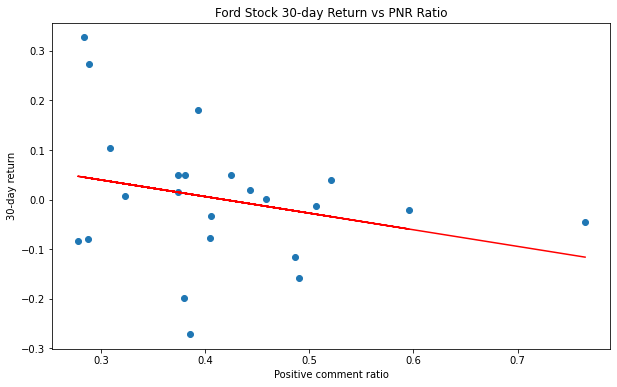

In [40]:
# Plot ret 7 vs pnr ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(sentiment_counts['pnr_ratio'], sentiment_counts['ret_30'])

# Fit a linear regression model
from sklearn.linear_model import LinearRegression

# get the x and y values
x = sentiment_counts['pnr_ratio'].values.reshape(-1, 1)
y = sentiment_counts['ret_30'].values.reshape(-1, 1)

# fit the model
model = LinearRegression().fit(x, y)

# get the slope and intercept
slope = model.coef_[0][0]

intercept = model.intercept_[0]

# plot the regression line
plt.plot(x, slope * x + intercept, color='red')

# Add x label and y label
plt.xlabel('Positive comment ratio')
plt.ylabel('30-day return')
plt.title('Ford Stock 30-day Return vs PNR Ratio')


In [29]:
ford_vids

# store this as a pickle file and a csv file
ford_vids.to_pickle('ford_vids.pkl')
ford_vids.to_csv('ford_vids.csv')


In [30]:
comments_df.to_pickle('ford_comments.pkl')
comments_df.to_csv('ford_comments.csv')

In [31]:
sentiment_counts.to_pickle('ford_sentiment_counts.pkl')
sentiment_counts.to_csv('ford_sentiment_counts.csv')